# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 


____


## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [76]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)



In [2]:
start= datetime.datetime(2006,1,1)

In [3]:
end= datetime.datetime(2016,1,1)

In [4]:
BAC= data.DataReader('BAC','yahoo',start,end)

In [7]:
CG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-03,22.450001,21.85,22.000000,22.049999,13298700.0,12.836194
2012-05-04,22.090000,22.00,22.049999,22.049999,6276200.0,12.836194
2012-05-07,22.090000,22.00,22.070000,22.010000,2800000.0,12.812909
2012-05-08,22.049999,22.00,22.010000,22.000000,6862700.0,12.807087
2012-05-09,22.059999,21.02,22.000000,21.750000,4307200.0,12.661552
...,...,...,...,...,...,...
2015-12-24,16.250000,15.91,16.030001,16.080000,260900.0,11.945655
2015-12-28,16.049999,15.62,15.910000,15.870000,803200.0,11.789648
2015-12-29,15.920000,15.73,15.870000,15.780000,733300.0,11.722789


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
CG = data.DataReader('CG','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)
WF = data.DataReader('WF','yahoo',start,end)


In [21]:
#JPM

In [8]:
tickers= ['BAC','CG','GS','JPM','MS','WF']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
df=pd.concat([BAC,CG,GS,JPM,MS,WF],axis=1,keys=tickers)

In [10]:
df.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   

             CG                 ...         MS                        \
           High Low Open Close  ...       Open      Close     Volume   
Date                            ...                                    
2006-01-03  NaN NaN  NaN   NaN  ...  57.169998  58.310001  5377000.0   
2006-01-04  NaN NaN  NaN   NaN  ...  58.700001  58.349998  7977800.0   
2006-01-05  NaN NaN  NaN   NaN  ...  58.549999  58.509998  5778000.0   
2006-01-06  NaN NaN  NaN   NaN  ...  58.770000  58.570000  6889800.0   
2006-01-09  NaN NaN  NaN   NaN  ...  58.630001  59.189999  4144500.0   

                              WF                                            \
            Adj Close       High        Low       Open      Close   Volume   
Date                                                                         
2006-01-03  37.758644  73.766388  72.228844  72.705605  72.884384  23400.0   
2006-01-04  37.784546  74.719902  72.884384  73.122765  74.016685  27200.0   
2006-01-05  37.888165  73.420738  72.526817  73.003578  72.669846  11000.0   
2006-01-06  37.927017  76.769966  73.897499  73.897499  75.744934  34800.0   
2006-01-09  38.328484  75.268173  74.195473  74.493446  74.195473  30900.0   

                       
            Adj Close  
Date                   
2006-01-03  58.224350  
2006-01-04  59.128902  
2006-01-05  58.052959  
2006-01-06  60.509521  
2006-01-09  59.271729  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [11]:
df.columns.names = ['Bank Ticker','Stock Info']

In [65]:
df.columns

MultiIndex([('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',      'Open'),
            ('BAC',     'Close'),
            ('BAC',    'Volume'),
            ('BAC', 'Adj Close'),
            ( 'CG',      'High'),
            ( 'CG',       'Low'),
            ( 'CG',      'Open'),
            ( 'CG',     'Close'),
            ( 'CG',    'Volume'),
            ( 'CG', 'Adj Close'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',      'Open'),
            ( 'GS',     'Close'),
            ( 'GS',    'Volume'),
            ( 'GS', 'Adj Close'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',      'Open'),
            ('JPM',     'Close'),
            ('JPM',    'Volume'),
            ('JPM', 'Adj Close'),
            ( 'MS',      'High'),
            ( 'MS',       'Low'),
            ( 'MS',      'Open'),
            ( 'MS',     'Close'),
            ( 'MS',    'Volume'),
            ( 

** Check the head of the bank_stocks dataframe.**

In [12]:
df.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker              CG                 ...         MS             \
Stock Info   Adj Close High Low Open Close  ...       Open      Close   
Date                                        ...                         
2006-01-03   35.298687  NaN NaN  NaN   NaN  ...  57.169998  58.310001   
2006-01-04   34.923801  NaN NaN  NaN   NaN  ...  58.700001  58.349998   
2006-01-05   34.968796  NaN NaN  NaN   NaN  ...  58.549999  58.509998   
2006-01-06   34.916302  NaN NaN  NaN   NaN  ...  58.770000  58.570000   
2006-01-09   34.938789  NaN NaN  NaN   NaN  ...  58.630001  59.189999   

Bank Ticker                               WF                                   \
Stock Info      Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03   5377000.0  37.758644  73.766388  72.228844  72.705605  72.884384   
2006-01-04   7977800.0  37.784546  74.719902  72.884384  73.122765  74.016685   
2006-01-05   5778000.0  37.888165  73.420738  72.526817  73.003578  72.669846   
2006-01-06   6889800.0  37.927017  76.769966  73.897499  73.897499  75.744934   
2006-01-09   4144500.0  38.328484  75.268173  74.195473  74.493446  74.195473   

Bank Ticker                      
Stock Info    Volume  Adj Close  
Date                             
2006-01-03   23400.0  58.224350  
2006-01-04   27200.0  59.128902  
2006-01-05   11000.0  58.052959  
2006-01-06   34800.0  60.509521  
2006-01-09   30900.0  59.271729  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

# 1) First way to grab below o/p(Max Close price of all banks for all the period)          using Multilevelindex

In [13]:
df['BAC']['Close'].max()

54.900001525878906

In [14]:
print('Bank Tickers')
for tick in tickers:
    print(tick,"\t",df[tick]['Close'].max())

Bank Tickers
BAC 	 54.900001525878906
CG 	 37.90999984741211
GS 	 247.9199981689453
JPM 	 70.08000183105469
MS 	 89.30000305175781
WF 	 99.86888885498047


# 2) Second way to grab below o/p(Max Close price of all banks for all the period) using .xs() method

In [15]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
CG      37.910000
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns = pd.DataFrame()

In [17]:
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.020456


In [ ]:
#sns.pairplot(df)

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

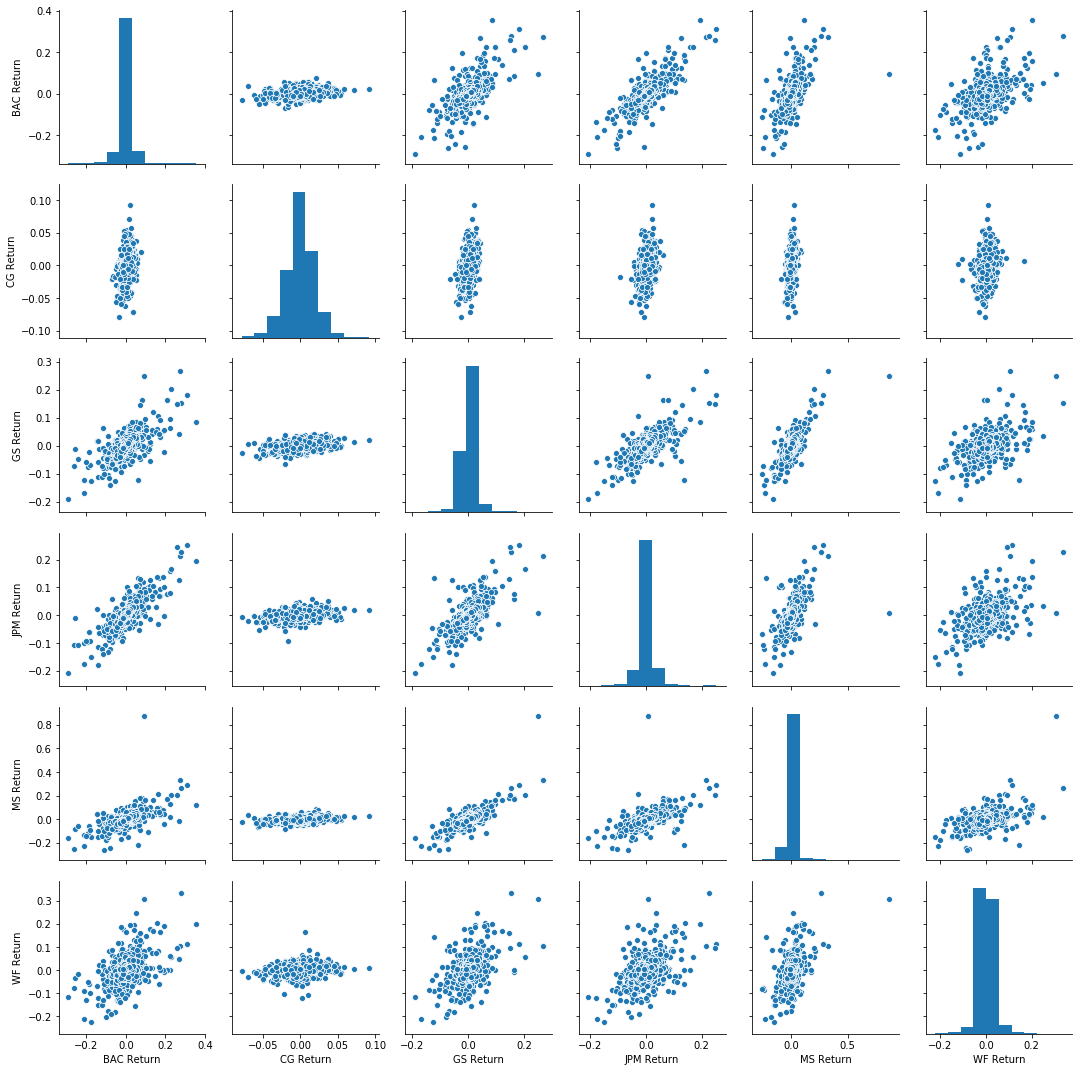

In [20]:
sns.pairplot(returns[1:])

In [33]:
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.020456


In [34]:
returns['BAC Return'].idxmin()

Timestamp('2009-01-20 00:00:00')

In [40]:
print("....Min Returns.....")
returns.idxmin()


....Min Returns.....


BAC Return   2009-01-20
CG Return    2013-02-21
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [51]:
print("....Max Returns....")
returns.idxmax()

....Max Returns....


BAC Return   2009-04-09
CG Return    2015-10-05
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]

In [59]:
df.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker              CG                 ...         MS             \
Stock Info   Adj Close High Low Open Close  ...       Open      Close   
Date                                        ...                         
2006-01-03   35.298687  NaN NaN  NaN   NaN  ...  57.169998  58.310001   
2006-01-04   34.923801  NaN NaN  NaN   NaN  ...  58.700001  58.349998   
2006-01-05   34.968796  NaN NaN  NaN   NaN  ...  58.549999  58.509998   

Bank Ticker                               WF                                   \
Stock Info      Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03   5377000.0  37.758644  73.766388  72.228844  72.705605  72.884384   
2006-01-04   7977800.0  37.784546  74.719902  72.884384  73.122765  74.016685   
2006-01-05   5778000.0  37.888165  73.420738  72.526817  73.003578  72.669846   

Bank Ticker                      
Stock Info    Volume  Adj Close  
Date                             
2006-01-03   23400.0  58.224350  
2006-01-04   27200.0  59.128902  
2006-01-05   11000.0  58.052959  

[3 rows x 36 columns]

In [62]:
df['BAC']['Close'].argmin()

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2009-03-06 00:00:00')

In [75]:
#min returns....

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [76]:
#max returns....

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [44]:
returns.std()

BAC Return    0.036647
CG Return     0.018727
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.035348
dtype: float64

In [66]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
CG Return     0.019148
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WF Return     0.022002
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64


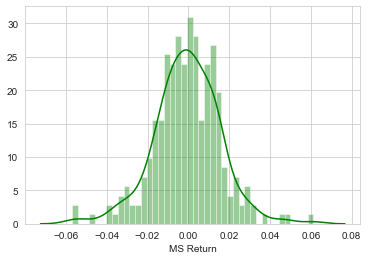

In [80]:
sns.set_style('whitegrid')
x= returns.loc['2015-01-01':'2015-12-31']['MS Return']
print(x)
sns.distplot(a=x,rug=False,kde=True,bins=42,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2012-12-24   -0.003056
2012-12-26   -0.003448
2012-12-27    0.006920
2012-12-28   -0.012982
2012-12-31    0.006963
Name: CG Return, Length: 250, dtype: float64


/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



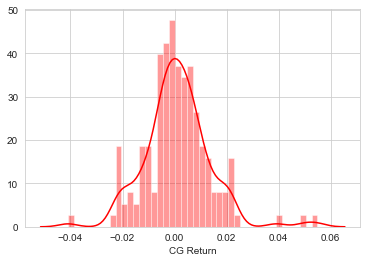

In [141]:
x2=returns.loc['2012-01-01':'2012-12-31']['CG Return']
print(x2)
sns.distplot(a=x2,bins=42,rug=False,kde=True,color='red')

In [139]:
CG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-03,22.450001,21.85,22.000000,22.049999,13298700.0,12.836194
2012-05-04,22.090000,22.00,22.049999,22.049999,6276200.0,12.836194
2012-05-07,22.090000,22.00,22.070000,22.010000,2800000.0,12.812909
2012-05-08,22.049999,22.00,22.010000,22.000000,6862700.0,12.807087
2012-05-09,22.059999,21.02,22.000000,21.750000,4307200.0,12.661552


____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [95]:
df.head(1)

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2006-01-03   47.18  46.150002  46.919998  47.080002  16296700.0  35.298687   

Bank Ticker   CG                 ...         MS                        \
Stock Info  High Low Open Close  ...       Open      Close     Volume   
Date                             ...                                    
2006-01-03   NaN NaN  NaN   NaN  ...  57.169998  58.310001  5377000.0   

Bank Ticker                    WF                                            \
Stock Info   Adj Close       High        Low       Open      Close   Volume   
Date                                                                          
2006-01-03   37.758644  73.766388  72.228844  72.705605  72.884384  23400.0   

Bank Ticker            
Stock Info  Adj Close  
Date                   
2006-01-03   58.22435  

[1 rows x 36 columns]

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [123]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

In [106]:
df.head(1)

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2006-01-03   47.18  46.150002  46.919998  47.080002  16296700.0  35.298687   

Bank Ticker   CG                 ...         MS                        \
Stock Info  High Low Open Close  ...       Open      Close     Volume   
Date                             ...                                    
2006-01-03   NaN NaN  NaN   NaN  ...  57.169998  58.310001  5377000.0   

Bank Ticker                    WF                                            \
Stock Info   Adj Close       High        Low       Open      Close   Volume   
Date                                                                          
2006-01-03   37.758644  73.766388  72.228844  72.705605  72.884384  23400.0   

Bank Ticker            
Stock Info  Adj Close  
Date                   
2006-01-03   58.22435  

[1 rows x 36 columns]

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

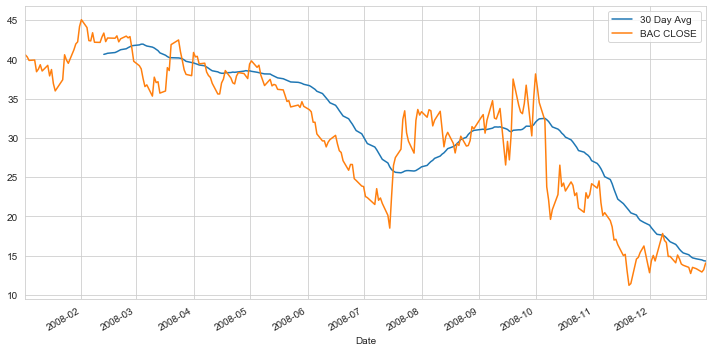

In [127]:
BAC.loc['2008-01-01':'2009-01-01']['Close'].rolling(window=30).mean().plot(label='30 Day Avg',figsize=(10,5))
BAC.loc['2008-01-01':'2009-01-01']['Close'].plot(label='BAC CLOSE')
plt.legend()
plt.tight_layout()

** Create a heatmap of the correlation between the stocks Close Price.**

In [146]:
correlation=df.xs(key='Close',level='Stock Info',axis=1).corr()

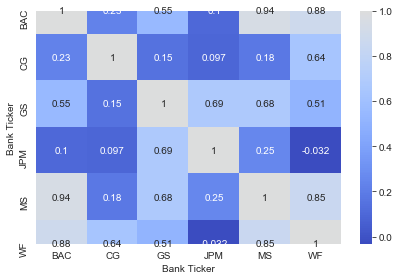

In [152]:
sns.heatmap(correlation,annot=True,center=True,cmap='coolwarm')
plt.tight_layout()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

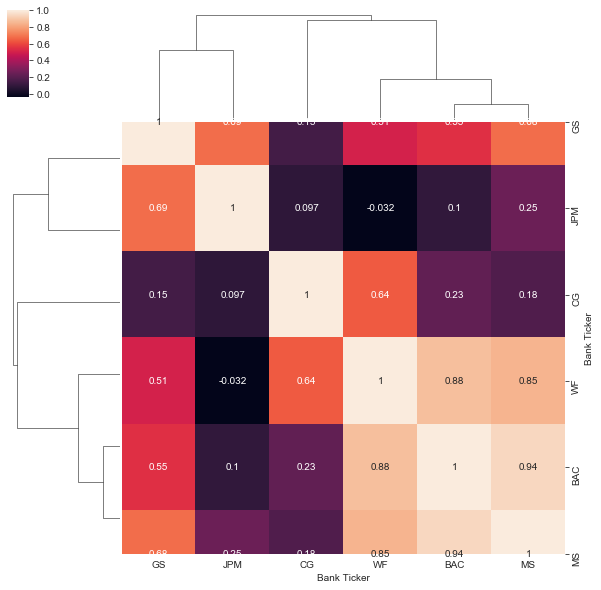

In [155]:
sns.clustermap(correlation,annot=True)

In [172]:
correlation.iplot(kind='heatmap')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [159]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [170]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [169]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

